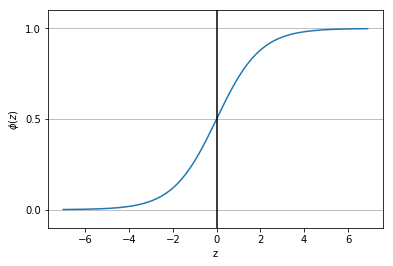

In [12]:
import  matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

z = np.arange(-7,7, 0.1)

phi_z = sigmoid(z)

plt.plot(z, phi_z)

plt.axvline(0.0, color='k')

plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')


plt.yticks([0.0, 0.5, 1.0])

ax = plt.gca()
ax.yaxis.grid(True)

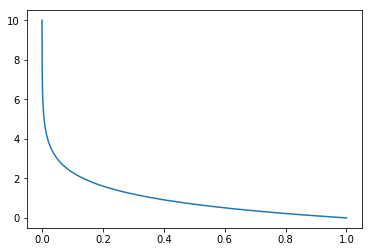

In [18]:
def cost_1(z):
    return -np.log(sigmoid(z))

def cost_0(z):
    return -np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)

phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(z) if y=1')

In [20]:
import numpy as np

class LogisticRegressionGD(object):
    """
    [Parameter]
    eta : float 学習率
    n_iter：int トレーニング回数
    random_state ： int 重みを初期化する際の乱数シード
    
    [data]
    w_ ： 1 array 重みパラメータ
    cost_ ： list 
    """
    
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """
        X : DataFrame データセット（説明変数）
        y : array 目的変数
        return : self(LogisticRegressionGD)
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            
            self.w_[1:] += self.eta*X.dot(errors)
            self.w_[0] += self.eta*errors.sum()
            
            cost = -y.dot(np.log(output)) - ((1-y).dot(np.log(1-output)))
            self.cost_.append(cost)
            
        return self
    
    def net_input(self, X):
        """ wxの算出"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        return 1.0/(1.0 + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        return np.where(self.net_input(x)>=0.0, 1, 0)
    

In [25]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np


iris = datasets.load_iris()
X = iris.data[:,[0,2]] #2列目:petal length（花びらの長さ）、3列目:petal width（花びらの幅）
y = iris.target

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


In [26]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() +1 
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() +1 
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=colors[idx], label=cl, edgecolor='black')
        
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c='', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test set')

In [24]:
X_train_01_subset = X_train[(y_train == 0)| (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0)| (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=100, random_state=1)

lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)

plt.xlabel()

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0])